# Algebra and geometry are one 

2. Given 3 points XYZ1, XYZ2, XYZ3 all sit on the same plane. 




a. Find the normal to the plane in one code-line. 


In [62]:
import numpy as np
from matplotlib import pyplot as plt
# import numpy.linalg as 

In [53]:

xyz1 = np.array([1, 2, 8])
xyz2 = np.array([0, 5, 11])
xyz3 = np.array([2, 4, 16])
xyz = np.vstack((xyz1, xyz2, xyz3))

In [54]:
n = np.cross(xyz2-xyz1,xyz3-xyz1)/np.linalg.norm(np.cross(xyz2-xyz1,xyz3-xyz1))
print(n)


[ 0.83027809  0.50739216 -0.2306328 ]


b. Try and multiply the matrix $xyz$ by the normal vector. What do you get? What does it mean geometrically?

In [55]:
print(np.dot(xyz,n.T))

[0. 0. 0.]


קיבלנו את וקטור האפס. זה אומר שהמישור עובר ב-0,0,0 כי כל נקודה בעצם מיצגת וקטור שמתחיל ב-0,0,0. וקיבלנו שוקטורים אלה אנכיים לנורמל, מה שאומר שהם על המישור

c. If we will scale the normal, will it change your answer for b? 

לא, קנ"מ לא ישפיע על כך שהנורמל אנכי למישור 

d. Use the function "Null(A)" that finds the null-space (the kernel) of a matrix with the matrix $xyz$. 

In [56]:
def Null(matrix):
    '''
    Find the null space of a matrix

    :param matrix: matrix to which the null space is needed

    :type matrix: np.array
  
    :return: the null space of the matrix
    
    :rtype: np.array    
    '''
    epsilon = 1e-12 #  numerical zero
    
    if (matrix.shape[0] - matrix.shape[1]) !=0:
        #non square matrix
        matrix = matrix.dot(matrix.T)
    u, s, vh = np.linalg.svd(matrix)
    null_mask = (s <= epsilon)

    return np.compress(null_mask, vh, axis=0)


In [57]:
nullSpace = Null(xyz)
print(nullSpace)

[[-0.83027809 -0.50739216  0.2306328 ]]


e. Compare the result of d with the normal. What are the differences? 

ההבדל היחיד במקרה זה הוא בסימן

וזהו הבדל לא באמת רלוונטי ותלוי בכיוון שבחרתי לוקטורים כשחישבנו את הנורמל

3. Given the following 2D vectors and the transformation matrices:

In [58]:
p1 = np.array([2, 5])
p2 = np.array([6, -1])
p3 = np.array([1, 0])
p4 = np.array([-4, 1.5])
p5 = np.array([-8.8, -13])
p6 = np.array([20.5, 16])
p7 = np.array([0, 1])
p8 = np.array([-0.95288594, 0.30332883])
p9 = np.array([-0.66195254, -0.74954575])


A = np.array([[1, 0], [0, 2]])
B = np.array([[1, np.tan(np.deg2rad(30))], [0, 1]])
C = np.array([[1.1853194, 0.96350986], [0.34729636, 1.96961551]])

a. Compute the transfomration of each point under each of the matrices, one line for each transformation. 

1. Under transformation ${\bf A}$:

In [67]:
transformedPointsA = np.dot(A,(np.vstack((p1,p2,p3,p4,p5,p6,p7,p8,p9)).T)).T
print(transformedPointsA)

[[  2.          10.        ]
 [  6.          -2.        ]
 [  1.           0.        ]
 [ -4.           3.        ]
 [ -8.8        -26.        ]
 [ 20.5         32.        ]
 [  0.           2.        ]
 [ -0.95288594   0.60665766]
 [ -0.66195254  -1.4990915 ]]


2. Draw the points before the transformation as black dots, and after transofrmation as orange stars

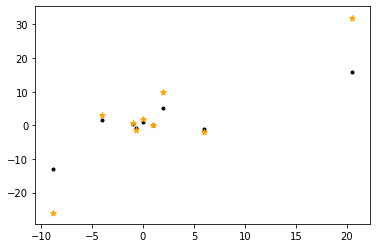

In [68]:
points = np.vstack(((p1,p2,p3,p4,p5,p6,p7,p8,p9)))
plt.scatter(points[:,0],points[:,1] ,c='black', marker='.')
plt.scatter(transformedPointsA[:,0],transformedPointsA[:,1] ,c='orange', marker='*')

3. On which vector the transformation doesn't change the vector up to scale?

In [91]:
transformedPointsA/points

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[ 1.,  2.],
       [ 1.,  2.],
       [ 1., nan],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [nan,  2.],
       [ 1.,  2.],
       [ 1.,  2.]])

p3,p7

b. 
1. Under transformation ${\bf B}$:

In [70]:
transformedPointsB = np.dot(B,(np.vstack((p1,p2,p3,p4,p5,p6,p7,p8,p9)).T)).T
print(transformedPointsB)

[[  4.88675135   5.        ]
 [  5.42264973  -1.        ]
 [  1.           0.        ]
 [ -3.1339746    1.5       ]
 [-16.3055535  -13.        ]
 [ 29.73760431  16.        ]
 [  0.57735027   1.        ]
 [ -0.77775896   0.30332883]
 [ -1.09470298  -0.74954575]]


2. Draw the points before the transformation as black dots, and after transofrmation as blue triangles

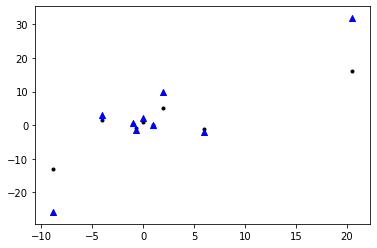

In [71]:
plt.scatter(points[:,0],points[:,1] ,c='black', marker='.')
plt.scatter(transformedPointsA[:,0],transformedPointsA[:,1] ,c='blue', marker='^')

3. On which vector the transformation doesn't change the vector up to scale?

In [90]:
transformedPointsB/points # test for scale
# we want to see same result in x and y
# the nan result is because 0 divide by 0

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[2.44337567, 1.        ],
       [0.90377496, 1.        ],
       [1.        ,        nan],
       [0.78349365, 1.        ],
       [1.85290381, 1.        ],
       [1.45061484, 1.        ],
       [       inf, 1.        ],
       [0.81621412, 1.        ],
       [1.65374844, 1.        ]])

p3

c. 
1. Under transformation ${\bf C}$:

In [74]:
transformedPointsC = np.dot(C,(np.vstack((p1,p2,p3,p4,p5,p6,p7,p8,p9)).T)).T
print(transformedPointsC)

[[  7.1881881   10.54267027]
 [  6.14840654   0.11416265]
 [  1.1853194    0.34729636]
 [ -3.29601281   1.56523782]
 [-22.9564389  -28.6612096 ]
 [ 39.71520546  38.63342354]
 [  0.96350986   1.96961551]
 [ -0.83721387   0.26650735]
 [ -1.50681991  -1.70621064]]


2. Draw the points before the transformation as black dots, and after transofrmation as magenta crosses

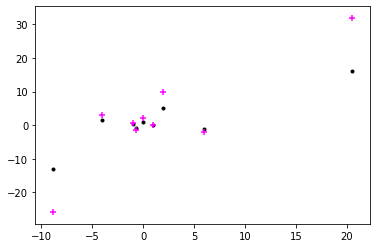

In [75]:
plt.scatter(points[:,0],points[:,1] ,c='black', marker='.')
plt.scatter(transformedPointsA[:,0],transformedPointsA[:,1] ,c='magenta', marker='+')

3. On which vector the transformation doesn't change the vector up to scale?

In [89]:
transformedPointsC/points

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[ 3.59409405,  2.10853405],
       [ 1.02473442, -0.11416265],
       [ 1.1853194 ,         inf],
       [ 0.8240032 ,  1.04349188],
       [ 2.60868624,  2.20470843],
       [ 1.9373271 ,  2.41458897],
       [        inf,  1.96961551],
       [ 0.87860869,  0.8786087 ],
       [ 2.2763262 ,  2.27632622]])

p8,p9

d. Use the function **np.linalg.eig** for each of the matrices, write down your result

In [79]:
print(np.linalg.eig(A))
print(np.linalg.eig(B))
print(np.linalg.eig(C))

(array([1., 2.]), array([[1., 0.],
       [0., 1.]]))
(array([1., 1.]), array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  3.84592537e-16]]))
(array([0.8786087 , 2.27632621]), array([[-0.95288594, -0.66195254],
       [ 0.30332883, -0.74954576]]))


e. Compare the results for a3, b3 and c3 with the results of d, for each transformation matrix

הוקטורים שלא השתנו עד כדי קנ"מ הם הוקטורים העצמיים של המטריצות

f. Given the matrix ${\bf D}$, on which vectors this transformation matrix will change only their scale?

In [80]:
D = np.array([[5, -6, -6], [-1, 4, 2], [3, -6, -4]])

הוקטורים שישתנו רק בקנ"מ הם הוקטורים העצמיים של המטריצה:

In [87]:
w,v = np.linalg.eig(D)
print(v)

[[ 0.6882472  -0.62406387  0.9427575 ]
 [-0.22941573  0.37401343  0.24308314]
 [ 0.6882472  -0.68604537  0.22829561]]
